# **Data Exploration**
**About dataset**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

## Setup Environment
Import necessary modules and configure the project path to access source code modules from the src directory.

In [1]:
import sys
import os

project_root = os.path.abspath("..")
sys.path.append(project_root)


## Import Required Libraries
Import NumPy for numerical operations and import visualization and data processing functions from custom modules.

In [2]:
import numpy as np
from src.visualization import *
from src.data_processing import *

## Load Raw Data
Read the creditcard.csv file from the raw data directory using NumPy's genfromtxt function.

In [3]:
path_data = '../Data/raw/creditcard.csv'
print("Reading creditcard.csv...")
data = np.genfromtxt(path_data , delimiter=',', skip_header=1, dtype= str, encoding='utf-8', missing_values=None)
print("Successful!")

Reading creditcard.csv...
Successful!


## Dataset Attributes Explanation

**Column Definitions:**
- **Time**: Seconds elapsed between each transaction and the first transaction in the dataset
- **V1 to V28**: Principal components obtained through PCA transformation (anonymized for confidentiality)
- **Amount**: Transaction amount in euros
- **Class**: Target variable (0 = Normal transaction, 1 = Fraudulent transaction)

The dataset is highly imbalanced with fraudulent transactions representing only 0.172% of all transactions.

In [4]:
with open(path_data, 'r', encoding='utf-8') as f:
    header_line = f.readline().strip()

attributes = header_line.split(',')
print("Attributes:", attributes)


Attributes: ['"Time"', '"V1"', '"V2"', '"V3"', '"V4"', '"V5"', '"V6"', '"V7"', '"V8"', '"V9"', '"V10"', '"V11"', '"V12"', '"V13"', '"V14"', '"V15"', '"V16"', '"V17"', '"V18"', '"V19"', '"V20"', '"V21"', '"V22"', '"V23"', '"V24"', '"V25"', '"V26"', '"V27"', '"V28"', '"Amount"', '"Class"']


## Display Sample Data
Show the first 5 rows of the dataset to examine the data structure and format.

In [5]:
formatted = np.array2string(
    data[:5],
    max_line_width=700,
    separator=" | "
)

print(formatted)

[['0' | '-1.3598071336738' | '-0.0727811733098497' | '2.53634673796914' | '1.37815522427443' | '-0.338320769942518' | '0.462387777762292' | '0.239598554061257' | '0.0986979012610507' | '0.363786969611213' | '0.0907941719789316' | '-0.551599533260813' | '-0.617800855762348' | '-0.991389847235408' | '-0.311169353699879' | '1.46817697209427' | '-0.470400525259478' | '0.207971241929242' | '0.0257905801985591' | '0.403992960255733' | '0.251412098239705' | '-0.018306777944153' | '0.277837575558899' | '-0.110473910188767' | '0.0669280749146731' | '0.128539358273528' | '-0.189114843888824' | '0.133558376740387' | '-0.0210530534538215' | '149.62' | '"0"'] |
 ['0' | '1.19185711131486' | '0.26615071205963' | '0.16648011335321' | '0.448154078460911' | '0.0600176492822243' | '-0.0823608088155687' | '-0.0788029833323113' | '0.0851016549148104' | '-0.255425128109186' | '-0.166974414004614' | '1.61272666105479' | '1.06523531137287' | '0.48909501589608' | '-0.143772296441519' | '0.635558093258208' | '0

## Separate Features and Target
Convert the data to proper data types: X_raw contains all features (columns except last) and y contains the target class labels (0 for normal, 1 for fraud).

In [6]:
X_raw = data[:, :-1].astype(np.float64)   
y = np.char.strip(data[:, -1], '"').astype(np.int32)  

In [7]:
stats = describe(X_raw)
col_names = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
print_describe(stats, feature_names=col_names)


Feature                  count           mean            std            25%            50%            75%            max            min
Time                      28480794813.85957547488.14595554201.50000084692.000000139320.500000172792.000000    0.000000
V1                        284807    0.000000    1.958696   -0.920373    0.018109    1.315642    2.454930  -56.407510
V2                        284807    0.000000    1.651309   -0.598550    0.065486    0.803724   22.057729  -72.715728
V3                        284807   -0.000000    1.516255   -0.890365    0.179846    1.027196    9.382558  -48.325589
V4                        284807    0.000000    1.415869   -0.848640   -0.019847    0.743341   16.875344   -5.683171
V5                        284807   -0.000000    1.380247   -0.691597   -0.054336    0.611926   34.801666 -113.743307
V6                        284807    0.000000    1.332271   -0.768296   -0.274187    0.398565   73.301626  -26.160506
V7                        284807   -0.0000

## Analyze Class Distribution
Display the distribution of fraud and normal transactions, and create a visualization showing the class imbalance.

Class distribution: Normal = 284,315, Fraud = 492


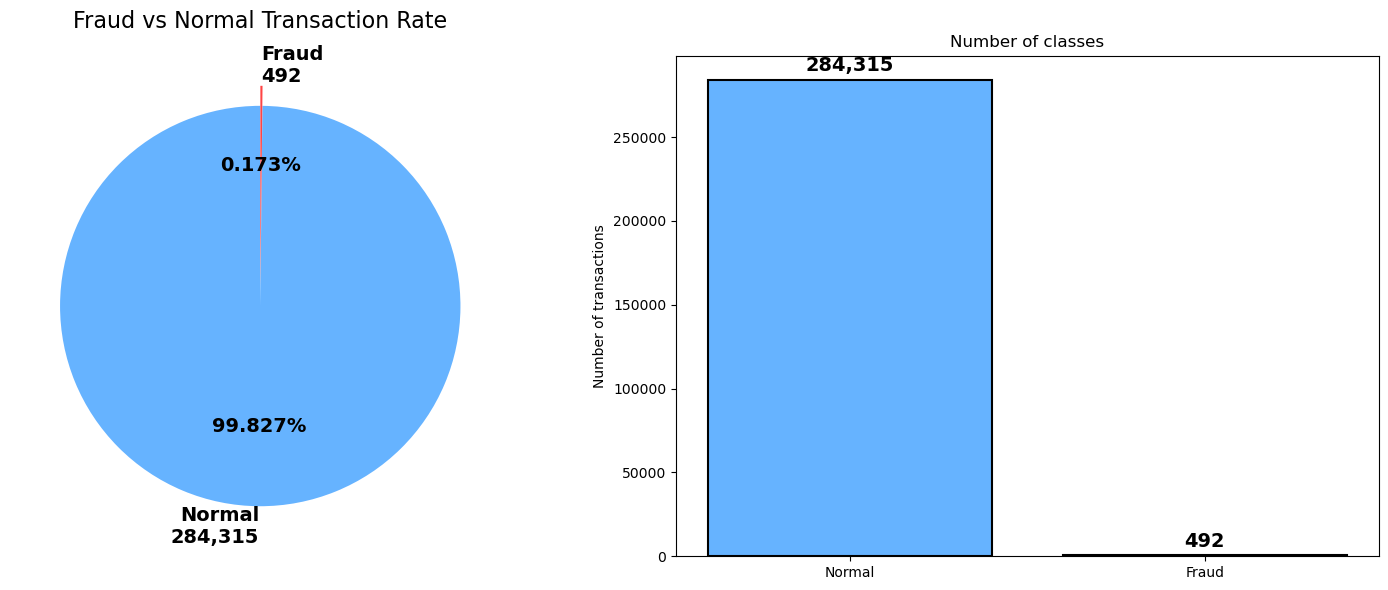

In [8]:
print(f"Class distribution: Normal = {np.sum(y==0):,}, Fraud = {np.sum(y==1):,}")
Fraud_Normal(np.sum(y==0), np.sum(y==1))

## Explore Time and Amount Features
Extract and visualize the relationship between transaction time and amount to understand data patterns.

Question: What trading times and trading volumes are frequent?

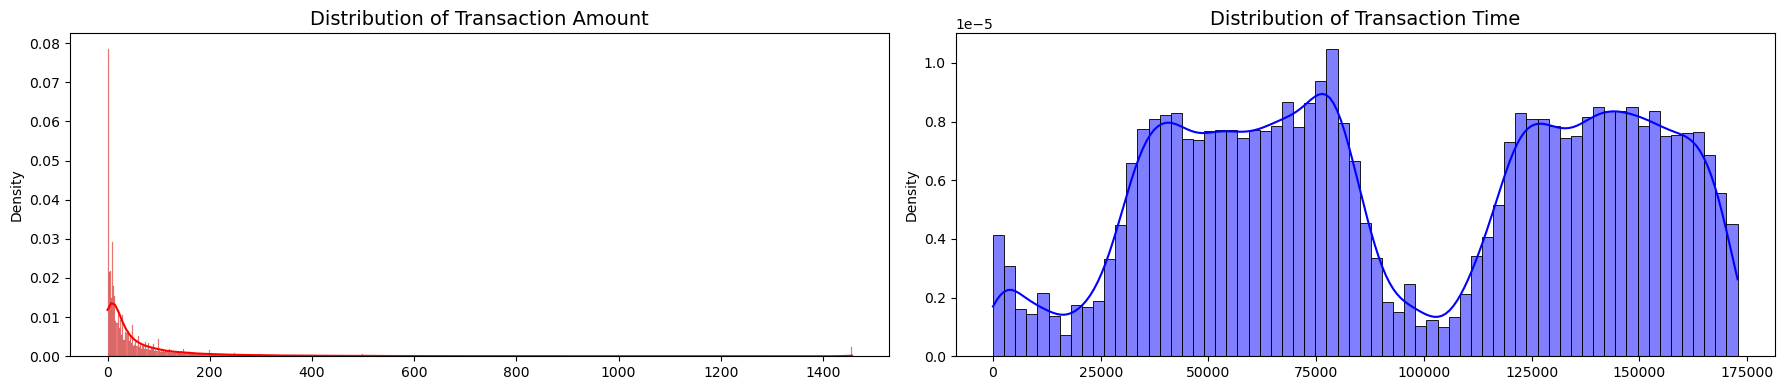

In [9]:
time_col   = X_raw[:, 0]    
amount_col = X_raw[:, 29]  
 
amount_col_idx = 29
p99_5 = np.percentile(X_raw[:, amount_col_idx], 99.5)
X_raw[:, amount_col_idx] = np.clip(X_raw[:, amount_col_idx], None, p99_5)

Transaction_Time_Amount(amount_col , time_col)


###  Plot the Total Amount by Hour for Normal and Fraud

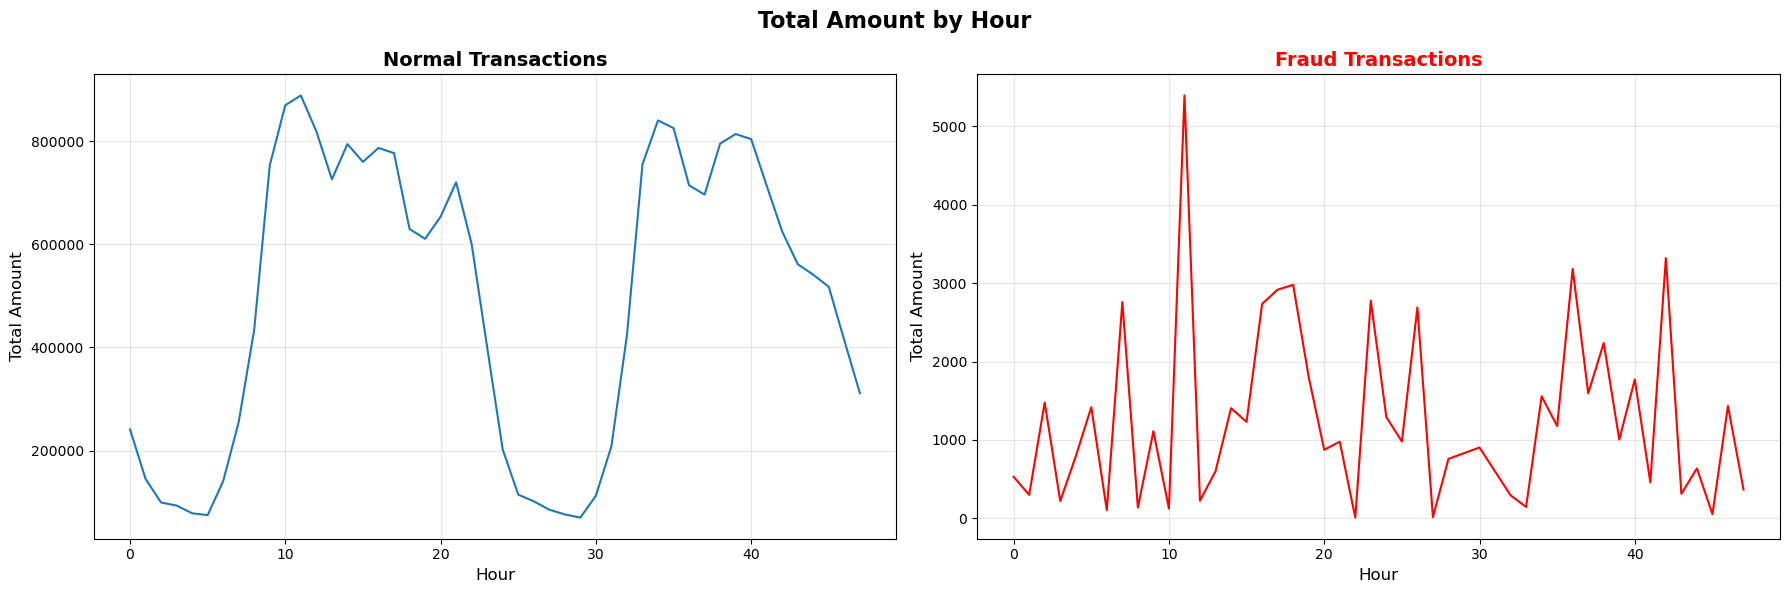

In [10]:
Plot_Amount_By_Hour(time_col, amount_col, y)

### Plot the number of transactions by Hour for Normal and Fraud

Question: Number of transactions per hour of each type?

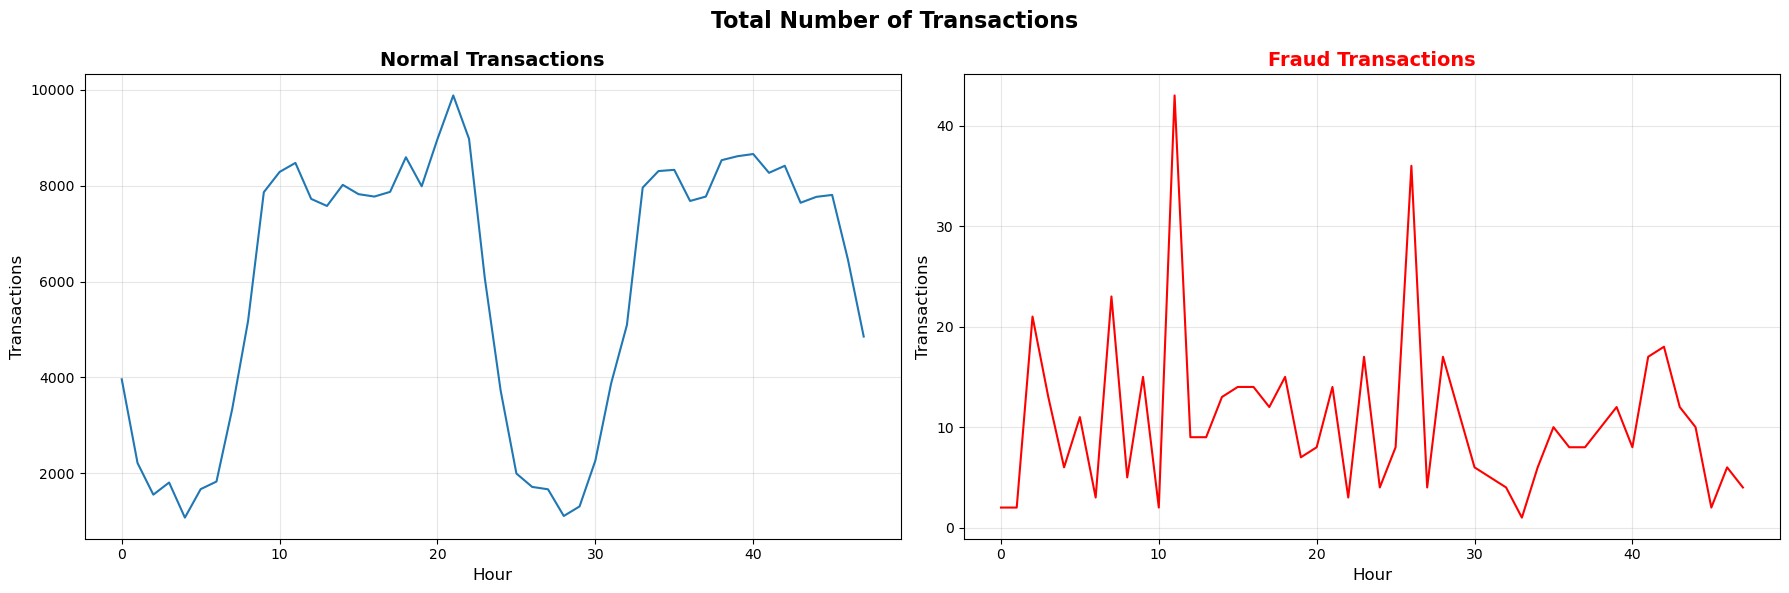

In [11]:
Plot_Transactions_By_Hour(time_col, y)

### Plot the average Amount by Hour for Normal and Fraud

Question: What is the average hourly trading volume of each?

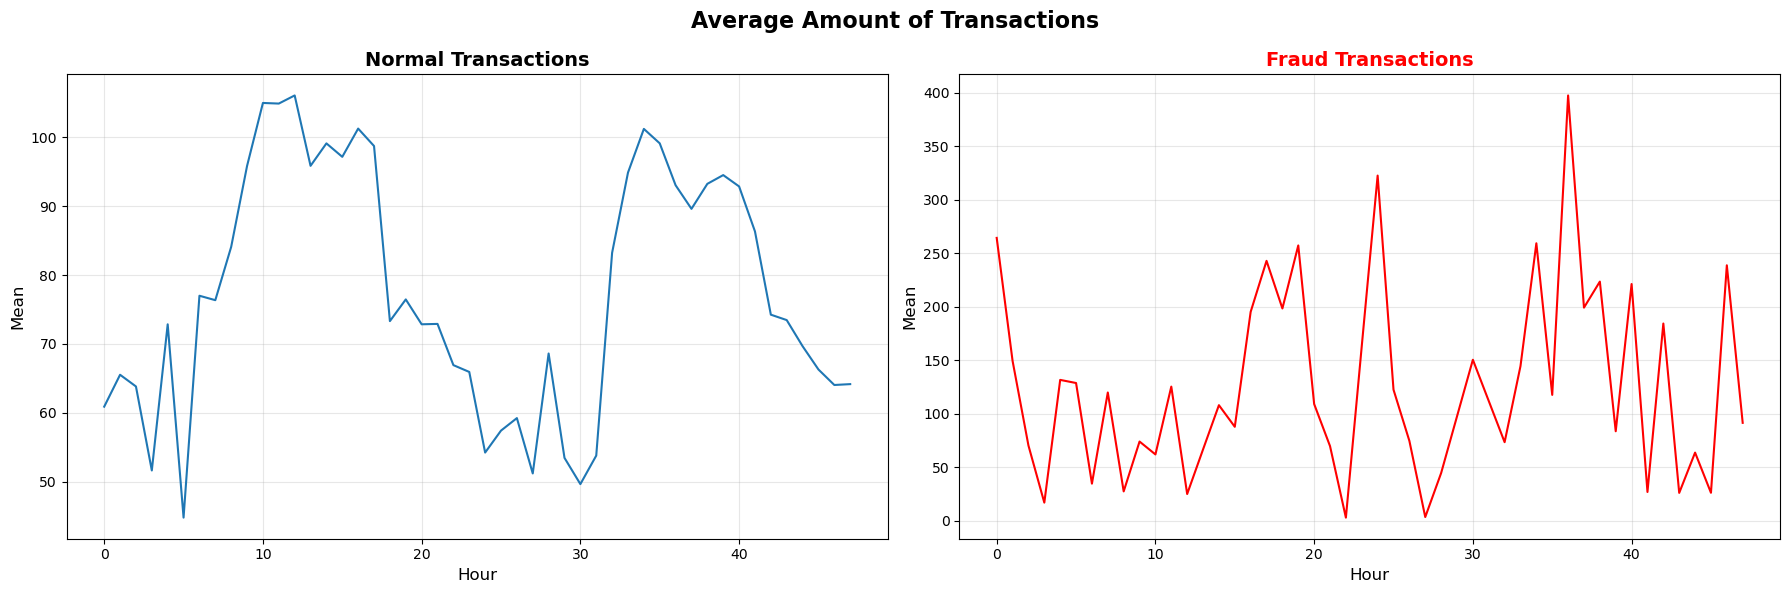

In [12]:
Plot_Average_Amount_By_Hour(time_col, amount_col, y)

### Draw boxplot Amount by Class (Normal vs Fraud)

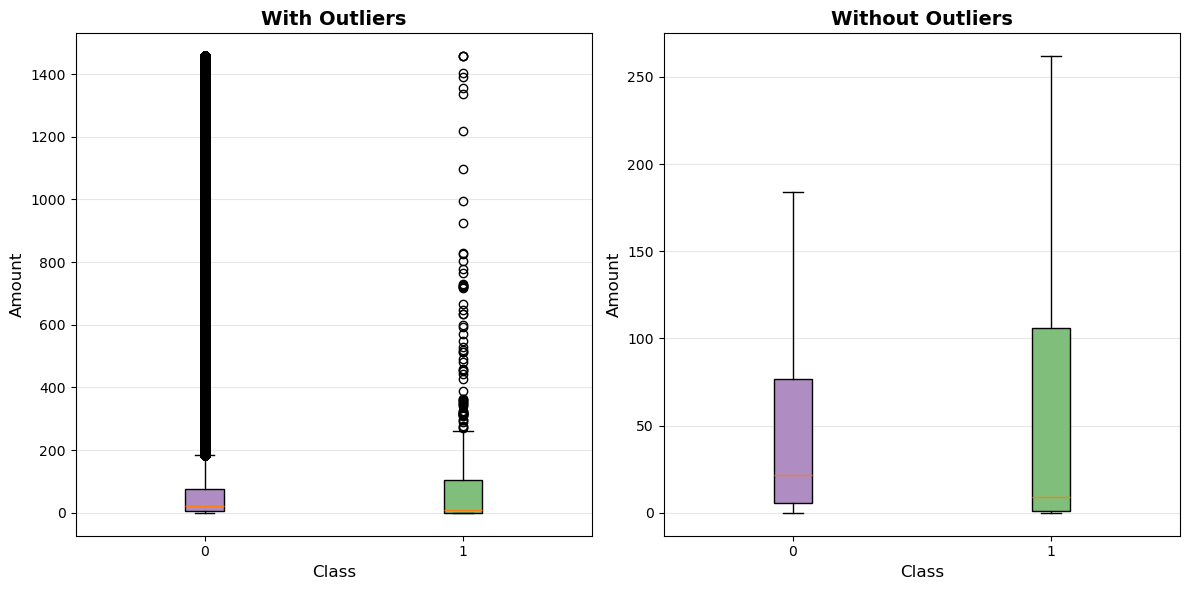

In [13]:
Plot_Amount_Boxplot(amount_col, y)

### Credit Card Transactions features correlation plot (Pearson)

Question: How do attributes affect results?

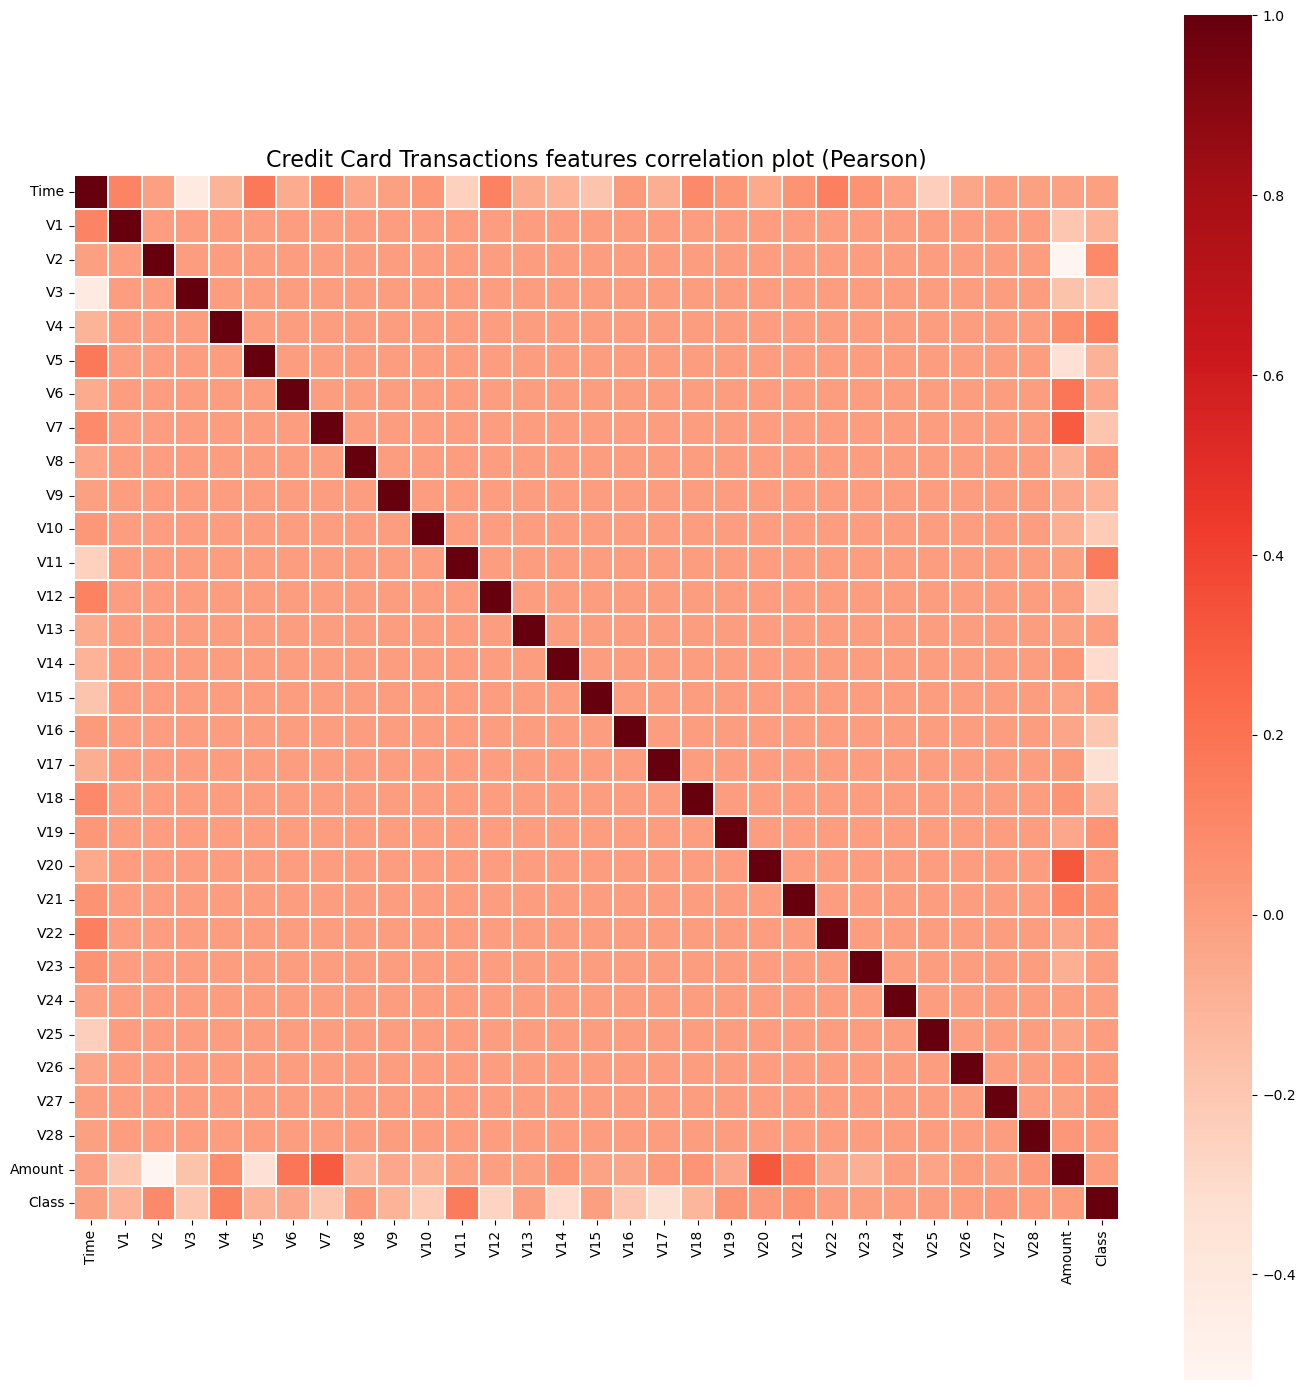

In [14]:
col_names = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']

Plot_Correlation_Heatmap(X_raw, y, feature_names=col_names)

## Clean Up Memory
Delete intermediate variables to free up memory after processing is complete.

In [15]:
del data, X_raw